<a href="https://colab.research.google.com/github/GustavBoye/DRED_Autoencoder/blob/main/GoogleTrendsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

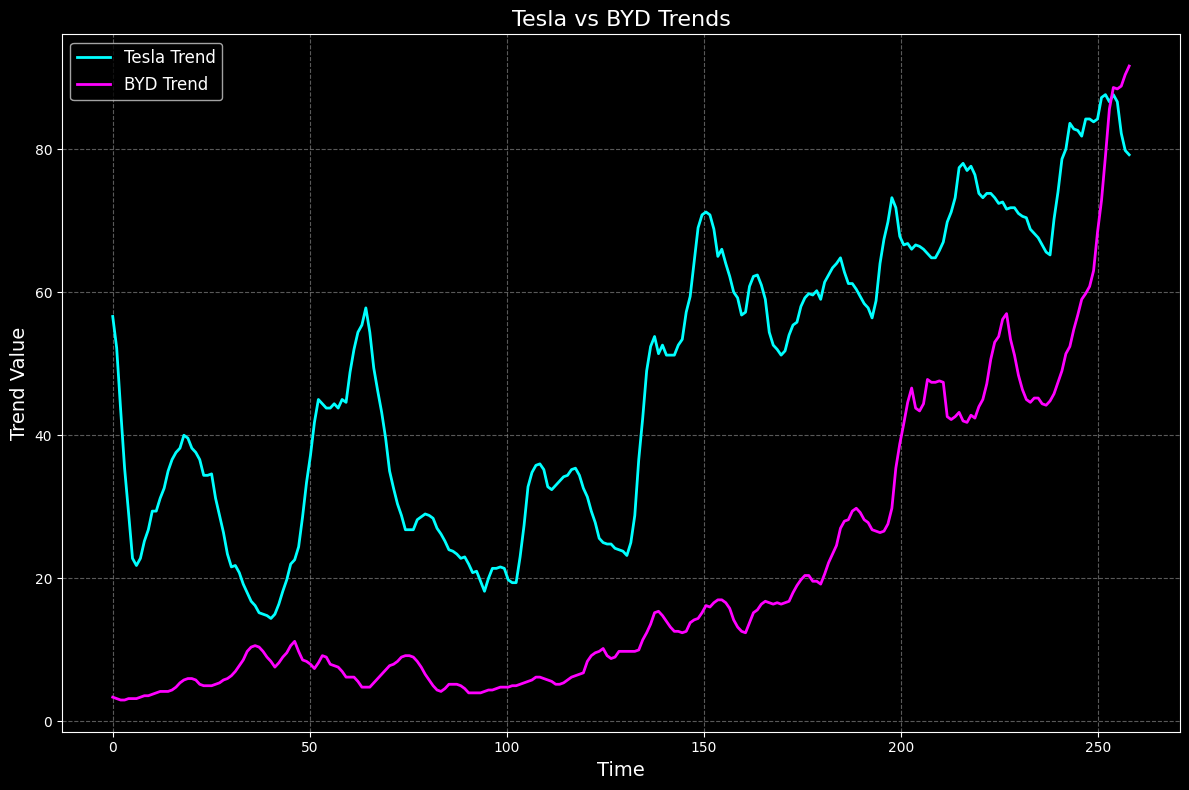

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Function to load CSV trend data
def load_csv_trend(file_path):
    data = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append(float(row[1]))  # Converting to float for numerical processing
    return data

# Load Tesla and BYD data
tesla_trend = load_csv_trend("Tesla_Trend.csv")
byd_trend = load_csv_trend("BYDDY_Trend.csv")

# Function to apply Simple Moving Average (SMA)
def apply_sma(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Smooth the data with a simple moving average (SMA) of window size 5
tesla_smoothed = apply_sma(tesla_trend, 5)
byd_smoothed = apply_sma(byd_trend, 5)

# Stretch the time axis (i.e., create a range that is evenly spaced)
time_tesla = np.linspace(0, len(tesla_smoothed), len(tesla_smoothed))
time_byd = np.linspace(0, len(byd_smoothed), len(byd_smoothed))

# Plotting the trends
plt.figure(figsize=(12, 8))
plt.style.use('dark_background')  # Set dark background

# Plot Tesla trend
plt.plot(time_tesla, tesla_smoothed, label='Tesla Trend', color='cyan', linewidth=2)

# Plot BYD trend
plt.plot(time_byd, byd_smoothed, label='BYD Trend', color='magenta', linewidth=2)

# Adding titles and labels
plt.title("Tesla vs BYD Trends", fontsize=16, color='white')
plt.xlabel("Time", fontsize=14, color='white')
plt.ylabel("Trend Value", fontsize=14, color='white')

# Add grid, legends, and customize plot
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
